# Universidad Autónoma de Yucatán

## Facultad de Matemáticas

### Machine Learning

**Teacher:** Dr. Victor Uc Cetina

**Student:** Dayan Bravo Fraga

# Create Animation **(Step 4 of 4)**

## Clone and load project from GitHub (only for Colab)

In [1]:
import sys
import os

in_colab: bool = 'google.colab' in sys.modules
if in_colab:
    print('Is running in Colab')
    if not os.path.isdir('machine_learning'):
        print("Downloading project")
        get_ipython().system('git clone https://github.com/dayan3847/machine_learning')
        sys.path.insert(0, './machine_learning/')
    else:
        get_ipython().system('git -C ./machine_learning fetch')
        get_ipython().system('git -C ./machine_learning rebase')
    if not os.path.isdir('reports'):
        print('Copying reports folder')
        get_ipython().system('cp -r ./machine_learning/dayan3847/stochastic_gradient_descent/colab/reports ./')
else:
    print('Is not running in Colab')

Is not running in Colab


## Import libraries

In [2]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Import History Generated

Paste the report number copied from the notebook:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dayan3847/machine_learning/blob/master/dayan3847/stochastic_gradient_descent/colab/1_generate_artificial_data_points.ipynb)

In [3]:
report_number: str = '20230514144011475656'

In [4]:
data_points: np.array = np.loadtxt(f'reports/{report_number}/data_points.csv', delimiter=',').T

In [5]:
print('\033[92m' + 'loading data... ' + '\033[0m')
history_df: pd.DataFrame = pd.read_csv(f'reports/{report_number}/history.csv')
print('\033[92m' + 'data loaded' + '\033[0m')

loading data... 
data loaded


In [6]:
function_str: str = open(f'reports/{report_number}/data_points_base_function.txt', 'r').read()
function: sp.Expr = sp.sympify(function_str)
print('\033[32m' + 'Imported base function:' + '\033[0m')
function

Imported base function:


sin(2*pi*x)

## Create Animation

In [7]:
x_ = np.linspace(0, 1, 100)
# Function Base
y_function_base = [function.subs('x', x_i) for x_i in x_]
history_polynomial = history_df['polynomial'].tolist()
history_polynomial_best = history_df['polynomial_best'].tolist()

In [8]:
total_frames: int = len(history_polynomial)
# total_frames = 100
total_frames

5001

In [9]:
def update_plot(frame):
    frame_i = frame
    print('\033[92m' + f'frame: {frame_i} of {total_frames}' + '\033[0m')
    plt.cla()

    plt.title("Iteration: {}".format(frame_i))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axvline(color='black')
    plt.axhline(color='black')

    # Data Points
    plt.scatter(data_points[0], data_points[1], color='gray', label='data points')
    # Function Base
    plt.plot(x_, y_function_base, label='function base', color='yellow', linestyle='--')
    # Function Current
    y_polynomial_current = [sp.sympify(history_polynomial[frame_i]).subs('x', x_i) for x_i in x_]
    plt.plot(x_, y_polynomial_current, label='polynomial current', color='blue', linestyle='--')
    # Function Best
    y_polynomial_best = [sp.sympify(history_polynomial_best[frame_i]).subs('x', x_i) for x_i in x_]
    plt.plot(x_, y_polynomial_best, label='polynomial best', color='green')

    plt.legend()
    plt.grid()
    return plt.gcf()

MovieWriter imagemagick unavailable; using Pillow instead.


creating animation... 
frame: 0 of 5001
frame: 0 of 5001
frame: 1 of 5001
frame: 2 of 5001
frame: 3 of 5001
frame: 4 of 5001
frame: 5 of 5001
frame: 6 of 5001
frame: 7 of 5001
frame: 8 of 5001
frame: 9 of 5001
frame: 10 of 5001
frame: 11 of 5001
frame: 12 of 5001
frame: 13 of 5001
frame: 14 of 5001
frame: 15 of 5001
frame: 16 of 5001
frame: 17 of 5001
frame: 18 of 5001
frame: 19 of 5001
frame: 20 of 5001
frame: 21 of 5001
frame: 22 of 5001
frame: 23 of 5001
frame: 24 of 5001
frame: 25 of 5001
frame: 26 of 5001
frame: 27 of 5001
frame: 28 of 5001
frame: 29 of 5001
frame: 30 of 5001
frame: 31 of 5001
frame: 32 of 5001
frame: 33 of 5001
frame: 34 of 5001
frame: 35 of 5001
frame: 36 of 5001
frame: 37 of 5001
frame: 38 of 5001
frame: 39 of 5001
frame: 40 of 5001
frame: 41 of 5001
frame: 42 of 5001
frame: 43 of 5001
frame: 44 of 5001
frame: 45 of 5001
frame: 46 of 5001
frame: 47 of 5001
frame: 48 of 5001
frame: 49 of 5001
frame: 50 of 5001
frame: 51 of 5001
frame: 52 of 5001
frame: 53 of 500

KeyboardInterrupt: 

frame: 0 of 5001


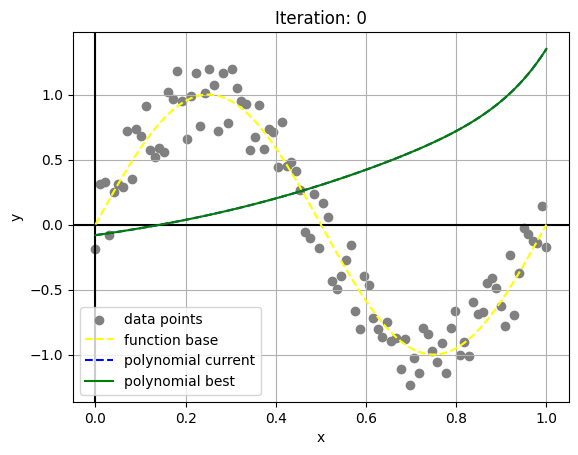

In [10]:
print('\033[92m' + 'creating animation... ' + '\033[0m')
fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, frames=total_frames, interval=1000)
# ani.save(f'reports/{report_number}/animation.mp4', writer='ffmpeg')
ani.save(f'reports/{report_number}/animation.gif', writer='imagemagick')